<a href="https://colab.research.google.com/github/hssitja/PhD-Dissertation/blob/Chapter-3/Chapter3_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
import numpy as np 
import matplotlib.pyplot as plt
# plt.style.use(['science', 'notebook', 'grid'])
plt.style.available
%matplotlib inline
import scipy as sp
import sympy as smp
from sympy import Piecewise, And, lambdify, symbols, plot, plot_implicit
from sympy.stats import Beta, density, P, E, variance, cdf, Kumaraswamy
from sympy.plotting.plot import Plot
from scipy.stats import beta

In [224]:
T, x_r, x_l = smp.symbols('T x_r x_l', Dummy = True)

In [225]:
A_r, A_l, W, mu, p, qtilde, qhat, theta, A_theta, x_theta = smp.symbols('A_r A_l W mu p qtilde qhat theta A_theta x_theta', real = True, positive = True)

In [226]:
# Defining chi as a random variable beta distributed

a, b = smp.symbols('a b', integer = True, positive = True)

z = smp.symbols('z')

a, b = (2,8) # shape parameters for beta distribution

Chi = Beta('chi', a, b)

D = density(Chi)(z)

In [227]:
f1 = (1-Chi)*mu # votes_r in separating equilibrium x_r = 0 & x_l = 1
f2 = Chi + (1-Chi)*(1-mu) # votes_l in separating equilibrium x_r = 0 & x_l = 1

f3 = Chi + (1-Chi)*(p*mu + (1-p)*(1-mu)) # votes for both types of incumbents in pooling equilibrium x_r = 1 & x_l = 1
f4 = Chi + (1-Chi)*(qhat*mu + (1-qhat)*(1-mu))# votes for both types of incumbents outside pooling equilibrium x_r = 1 & x_l = 1

f5 = (1-Chi)*(p*mu + (1-p)*(1-mu)) # votes for both types of incumbents in pooling equilibrium x_r = 1 & x_l = 1
f6 = (1-Chi)*(qtilde*mu + (1-qtilde)*(1-mu))# votes for both types of incumbents outside pooling equilibrium x_r = 1 & x_l = 1

votes_r = Piecewise((f1, And(x_r < 1, x_l > 0)), (f3, And(x_r > 0, x_l > 0)), (f5, And(x_r < 1, x_l < 1)))
votes_l = Piecewise((f2, And(x_r < 1, x_l > 0)), (f3, And(x_r > 0, x_l > 0)), (f5, And(x_r < 1, x_l < 1)))

In [228]:
votes_l

Piecewise(((1 - mu)*(1 - chi) + chi, (x_l > 0) & (x_r < 1)), ((1 - chi)*(mu*p + (1 - mu)*(1 - p)) + chi, (x_l > 0) & (x_r > 0)), ((1 - chi)*(mu*p + (1 - mu)*(1 - p)), (x_l < 1) & (x_r < 1)))

In [229]:
smp.latex(votes_r)

'\\begin{cases} \\mu \\left(1 - \\chi\\right) & \\text{for}\\: x_{l} > 0 \\wedge x_{r} < 1 \\\\\\left(1 - \\chi\\right) \\left(\\mu p + \\left(1 - \\mu\\right) \\left(1 - p\\right)\\right) + \\chi & \\text{for}\\: x_{l} > 0 \\wedge x_{r} > 0 \\\\\\left(1 - \\chi\\right) \\left(\\mu p + \\left(1 - \\mu\\right) \\left(1 - p\\right)\\right) & \\text{for}\\: x_{l} < 1 \\wedge x_{r} < 1 \\end{cases}'

\begin{equation}votes_r = \begin{cases} \mu \left(1 - \chi\right) & \text{for}\: x_{l} > 0 \wedge x_{r} < 1 \\\left(1 - \chi\right) \left(\mu p + \left(1 - \mu\right) \left(1 - p\right)\right) + \chi & \text{for}\: x_{l} > 0 \wedge x_{r} > 0 \\\left(1 - \chi\right) \left(\mu p + \left(1 - \mu\right) \left(1 - p\right)\right) & \text{for}\: x_{l} < 1 \wedge x_{r} < 1 \end{cases} \end{equation}

In [230]:
Chi2 = Kumaraswamy('chi2', 2, 20)
cdf(Chi)(z), cdf(Chi2)(z)

(Piecewise((-z**9/(9*beta(2, 8)) + 7*z**8/(8*beta(2, 8)) - 3*z**7/beta(2, 8) + 35*z**6/(6*beta(2, 8)) - 7*z**5/beta(2, 8) + 21*z**4/(4*beta(2, 8)) - 7*z**3/(3*beta(2, 8)) + z**2/(2*beta(2, 8)), z >= 0), (0, True)),
 Piecewise((0, z < 0), (1 - (1 - z**2)**20, z <= 1), (1, True)))

In [231]:
P(Chi2 < 0.5), P(Chi < 0.5).evalf()

(0.996828788061066, 0.980468749999998)

In [232]:
f = (2*mu - 1)/2*mu
Psi_p = (0.5 - (p*mu + (1-mu)*(1-p)))/(1-(p*mu + (1-mu)*(1-p)))
Psi_qtilde = (2*(qtilde*mu + (1-qtilde)*(1-mu))-1)/(2*(qtilde*mu + (1-qtilde)*(1-mu)))

In [233]:
Psi_p

(-mu*p - (1 - mu)*(1 - p) + 0.5)/(-mu*p - (1 - mu)*(1 - p) + 1)

In [234]:
Psi_qtilde

(2*mu*qtilde + 2*(1 - mu)*(1 - qtilde) - 1)/(2*mu*qtilde + 2*(1 - mu)*(1 - qtilde))

In [235]:
Psi_p.simplify()

(mu*p + (mu - 1)*(p - 1) - 0.5)/(mu*p + (mu - 1)*(p - 1) - 1)

In [236]:
Psi_qtilde.simplify()

(2*mu*qtilde - mu - qtilde + 1/2)/(2*mu*qtilde - mu - qtilde + 1)

In [237]:
Psi_p.cancel()

(2.0*mu*p - 1.0*mu - 1.0*p + 0.5)/(2.0*mu*p - 1.0*mu - 1.0*p)

In [238]:
Psi_qtilde.cancel()

(4*mu*qtilde - 2*mu - 2*qtilde + 1)/(4*mu*qtilde - 2*mu - 2*qtilde + 2)

In [239]:
f.simplify()

mu*(mu - 1/2)

In [240]:
cdf(Chi)(f.subs(mu,0.7)).evalf()

0.365657994534039

In [241]:
elected_r, elected_l, elected_theta = smp.symbols('elected_r elected_l elected_theta')

In [242]:
Util_r, Util_l = ( (A_r*x_r*(1-T) - A_r*x_r*T) + (A_r*(1-x_r)*T - A_r*(1-x_r)*(1-T) + W*elected_r),
                  (A_l*x_l*(1-T) - A_l*x_l*T) + (A_l*(1-x_l)*T - A_l*(1-x_l)*(1-T) + W*elected_l) )

In [243]:
Util_theta = A_theta*x_theta + W*elected_theta
Util_theta

A_theta*x_theta + W*elected_theta

In [244]:
# Contour plots
res_1 = smp.Rational(1,2) - cdf(Chi)((2*mu - 1)/2*mu)

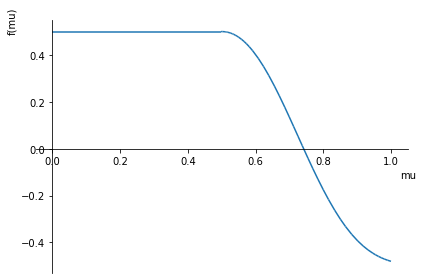

In [245]:
plot(res_1, (mu,0,1))

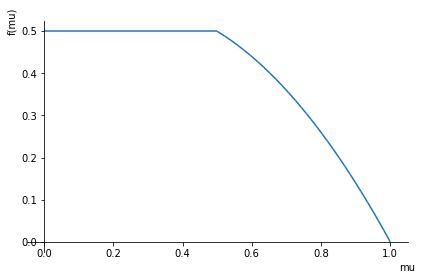

In [246]:
# Comparison with Chi uniform distributed

ChiU = Beta('chi', 1, 1)
res_1_U = smp.Rational(1,2) - cdf(ChiU)((2*mu - 1)/2*mu)
plot(res_1_U, (mu,0,1))

In [247]:
z = smp.symbols('z')

res_1, res_2, res_3, res_4 = smp.symbols('res_1 res_2 res_3 res_4', real=True, positive=True)

res = Piecewise((res_1, z < 0), (res_2, And(z >= 0, z < 1)), (res_3, And(z >= 1, z < 2)), (res_4, z > 2))

In [248]:
res

Piecewise((res_1, z < 0), (res_2, z < 1), (res_3, z < 2), (res_4, z > 2))

In [249]:
def function_z(x):
  return smp.Rational(1,2) - cdf(Chi)((2*x - 1)/2*x)

In [250]:
x = np.linspace(0,1,50)
z = function_z(0.7)

In [251]:
z.evalf()

0.134342005465961

In [252]:
.5 - cdf(Chi)(f.subs(mu,0.7)).evalf()

0.134342005465961

In [253]:
def function_1(mu):
  return (2*mu - 1)/2*mu

def function_2(mu,p):
  return (0.5 - (p*mu + (1-mu)*(1-p)))/(1-(p*mu + (1-mu)*(1-p)))


In [254]:
function_2(.5,.5)

0.0

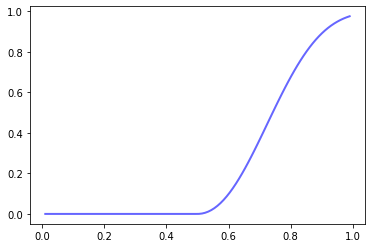

In [259]:
fig, ax = plt.subplots(1, 1)

a, b = 2, 8

x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
ax.plot(y, beta.cdf(function_1(y), a, b),
       'b-', lw=2, alpha=0.6, label='beta cdf')

In [256]:
x = np.linspace(0.01,.99,100)
y = np.linspace(0.01,.99,100)
X, Y = np.meshgrid(x,y)
z = function_2(X,Y)
Z = beta.cdf(function_2(X,Y), a, b)

Text(0, 0.5, 'p')

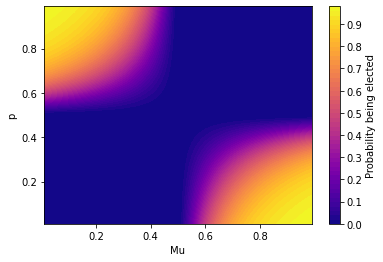

In [258]:
plt.contourf(X,Y,Z, levels=50, cmap='plasma')
plt.colorbar(label='Probability being elected')
plt.xlabel('Mu')
plt.ylabel('p')

Text(0, 0.5, 'p')

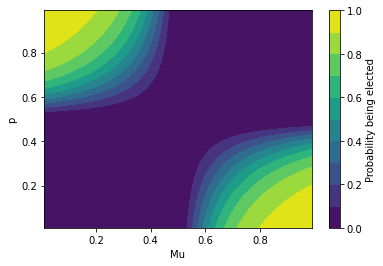

In [262]:
plt.contourf(X,Y,Z, levels=10)
plt.colorbar(label='Probability being elected')
plt.xlabel('Mu')
plt.ylabel('p')

<a list of 10 text.Text objects>

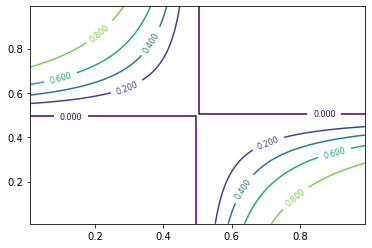

In [261]:
cs = plt.contour(X,Y,Z, levels=5)
plt.clabel(cs, fontsize=8)

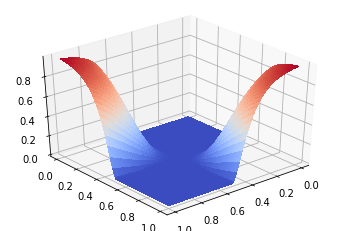

In [266]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X,Y,Z, cmap='coolwarm',
                       linewidth=0, antialiased=False)
ax.view_init(elev=35, azim=50)